In [145]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [146]:
static=pd.read_csv('posture_data/data_walking_static.csv')
backpack_static=pd.read_csv('posture_data/data_backpack_static.csv')
sidepack_static=pd.read_csv('posture_data/data_sidepack_static.csv')
trial=pd.read_csv('posture_data/data_walking.csv')
backpack_trial=pd.read_csv('posture_data/data_backpack_trial.csv')
sidepack_trial=pd.read_csv('posture_data/data_sidepack_trial.csv')

In [147]:
# anthropometric data 
m=75 # kg
h=1.75 # m
# pelvis mass
mass_of_pelvis=0.1117 # kg
# segment lengths
pelvis_comz=0.5
# radius of gyration 
pelvis_kx=0.615
pelvis_ky=0.551
pelvis_kz=0.587


# trunk 
mass_of_trunk=0.3229
trunk_comz=0.4166
trunk_kx=0.328
trunk_ky=0.306
trunk_kz=0.169

# normalize posture sway by hip width 
hip_width=0.191*h




# Gait Cycle

In [148]:
grf_walking=pd.read_csv('GRF/GRF_walking.csv')
grf_backpack=pd.read_csv('GRF/GRF_backpack_trial.csv')
grf_sidepack=pd.read_csv('GRF/GRF_sidepack_trial.csv')

In [149]:
time_walking=grf_walking['Frame#']
time_backpack=grf_backpack['Frame#']
time_sidepack=grf_sidepack['Frame#']

threshold=20
contact_walking=grf_walking['L.FZ']>threshold
hs_walking=np.where(np.diff(contact_walking.astype(int))==1)[0]
toff_walking=np.where(np.diff(contact_walking.astype(int))==-1)[0]

contact_backpack=grf_backpack['L.FZ']>threshold
hs_backpack=np.where(np.diff(contact_backpack.astype(int))==1)[0]
toff_backpack=np.where(np.diff(contact_backpack.astype(int))==-1)[0]

contact_sidepack=grf_sidepack['L.FZ']>threshold
hs_sidepack=np.where(np.diff(contact_sidepack.astype(int))==1)[0]
toff_sidepack=np.where(np.diff(contact_sidepack.astype(int))==-1)[0]

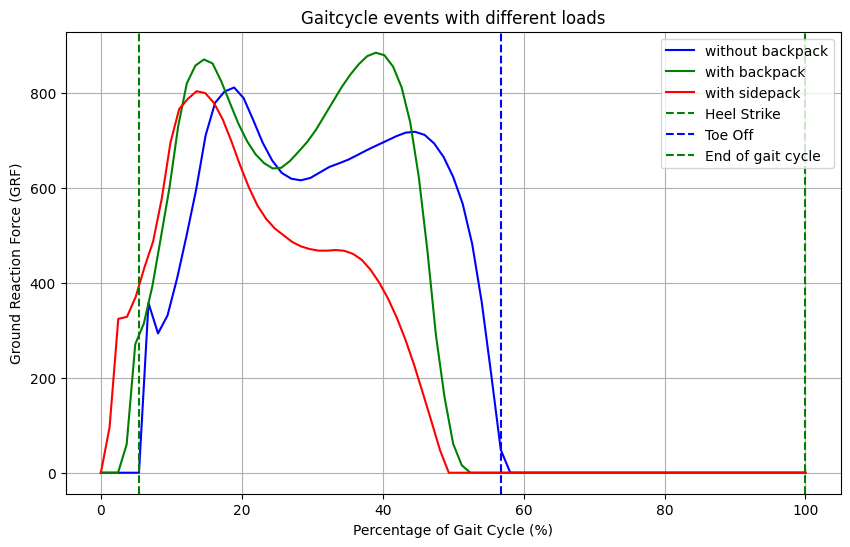

In [150]:

walking = grf_walking['L.FZ']
backpack = grf_backpack['L.FZ']
sidepack = grf_sidepack['L.FZ']

def normalize_by_time(cycle_data):
    return np.linspace(0, 100, len(cycle_data))

walking_normalized = normalize_by_time(walking)
backpack_normalized = normalize_by_time(backpack)
sidepack_normalized = normalize_by_time(sidepack)

plt.figure(figsize=(10, 6))
plt.plot(walking_normalized, walking, label="without backpack", color='b')
plt.plot(backpack_normalized, backpack, label="with backpack", color='g')
plt.plot(sidepack_normalized, sidepack, label="with sidepack", color='r')

plt.axvline(walking_normalized[hs_walking[0]], color='green', linestyle='--', label='Heel Strike')
plt.axvline(walking_normalized[toff_walking[0]], color='blue', linestyle='--', label='Toe Off ')
plt.axvline(100, color='green', linestyle='--', label='End of gait cycle')

# Add labels and title
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Ground Reaction Force (GRF)")
plt.title("Gaitcycle events with different loads")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


# Trunk Tilt

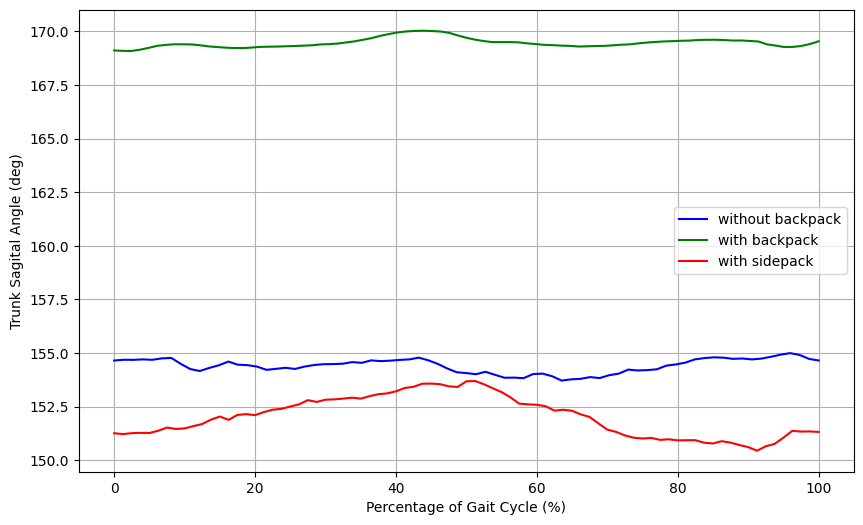

In [151]:

walking_t = trial['Trunk_rx_deg']
backpack_t = backpack_trial['Trunk_rx_deg']
sidepack_t = sidepack_trial['Trunk_rx_deg']

def normalize_by_time(cycle_data):
    return np.linspace(0, 100, len(cycle_data))

walking_t_normalized = normalize_by_time(walking_t)
backpack_t_normalized = normalize_by_time(backpack_t)
sidepack_t_normalized = normalize_by_time(sidepack_t)

plt.figure(figsize=(10, 6))
plt.plot(walking_t_normalized, walking_t, label="without backpack", color='b')
plt.plot(backpack_t_normalized, backpack_t, label="with backpack", color='g')
plt.plot(sidepack_t_normalized, sidepack_t, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Trunk Sagital Angle (deg)")
#plt.title("Impact of Backpack on Trunk Sagital Angle in Dynamic Case")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

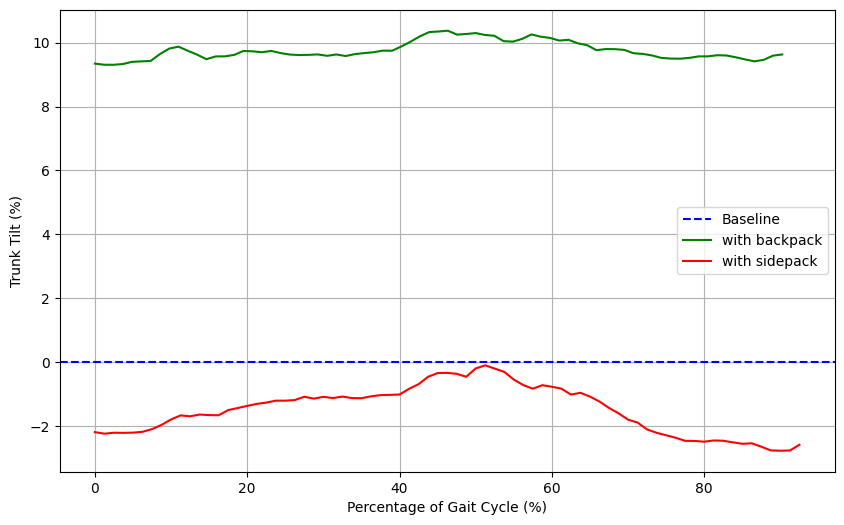

In [152]:

percentage_sway=(backpack_t-walking_t)/walking_t*100
percentage_sway_side=(sidepack_t-walking_t)/walking_t*100

plt.figure(figsize=(10, 6))
sway_n=normalize_by_time(percentage_sway)
sways=normalize_by_time(percentage_sway_side)
plt.axhline(y=0, color='blue', linestyle='--', label='Baseline')
plt.plot(sway_n, percentage_sway, label="with backpack", color='g')
plt.plot(sways, percentage_sway_side, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Trunk Tilt (%)")
#plt.title("Impact of Backpack on Trunk Sagital Angle in Dynamic Case")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

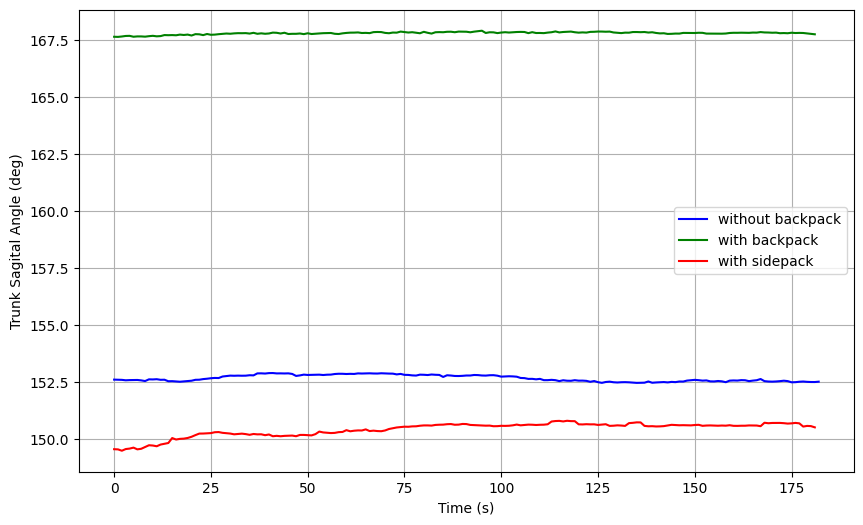

In [172]:

static_t = static['Trunk_rx_deg']
sbackpack_t = backpack_static['Trunk_rx_deg'][0:182]
ssidepack_t = sidepack_static['Trunk_rx_deg'][0:182]

def normalize_by_time(cycle_data):
    return np.linspace(0, 100, len(cycle_data))


plt.figure(figsize=(10, 6))
plt.plot( static_t, label="without backpack", color='b')
plt.plot( sbackpack_t, label="with backpack", color='g')
plt.plot( ssidepack_t, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Trunk Sagital Angle (deg)")
#plt.title("Impact of Backpack on Trunk Sagital Angle in Dynamic Case")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

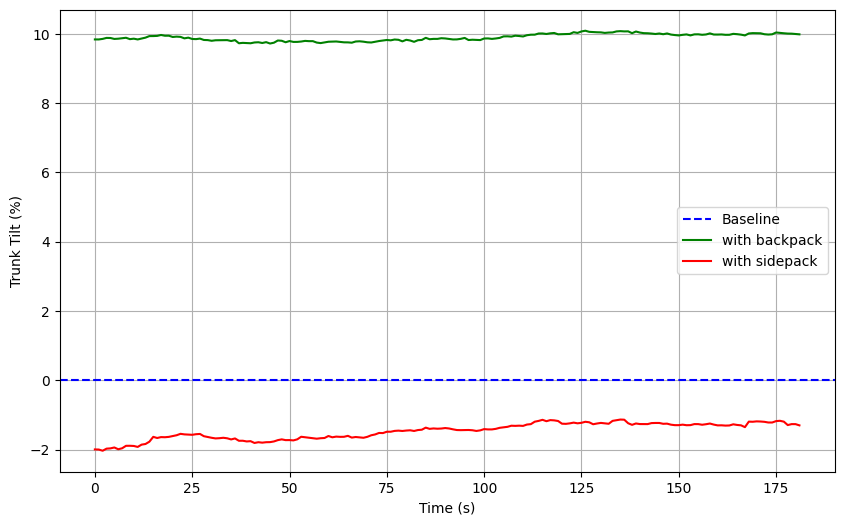

In [174]:

spercentage_sway=(sbackpack_t-static_t)/static_t*100
spercentage_sway_side=(ssidepack_t-static_t)/static_t*100

plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='blue', linestyle='--', label='Baseline')
plt.plot( spercentage_sway, label="with backpack", color='g')
plt.plot( spercentage_sway_side, label="with sidepack", color='r')


# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Trunk Tilt (%)")
#plt.title("Impact of Backpack on Trunk Sagital Angle in Dynamic Case")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

 Posture Sway - COM

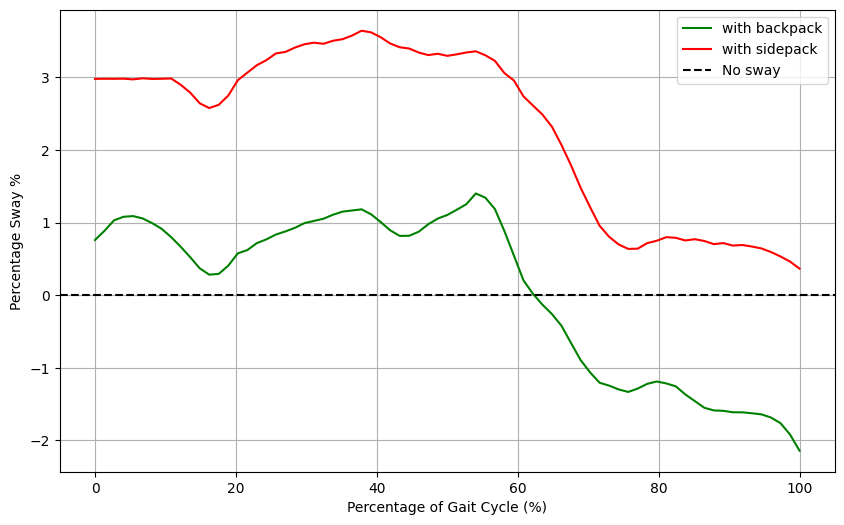

In [155]:
# COM calculation 
# anthropometric data 
m=75 # kg
h=1.75 # m
# pelvis mass
mass_of_pelvis=0.1117 # kg
# segment lengths
pelvis_comz=0.5
# radius of gyration 
pelvis_kx=0.615
pelvis_ky=0.551
pelvis_kz=0.587


# trunk 

trunk_comz=0.4166
trunk_kx=0.328
trunk_ky=0.306
trunk_kz=0.169

# normalize posture sway by hip width 
hip_width=0.191*h
comlthigh=0.433*trial['L.Thigh_l_mm']
comrthigh=0.433*trial['R.Thigh_l_mm']
compelvis=0.105*trial['Pelvis_l_mm']
comtrunk=0.5*trial['Trunk_l_mm']
mrthigh=0.1416
mlthigh=0.1416
mpelvis=0.1117
mass_of_trunk=0.3229
M=mrthigh+mlthigh+mpelvis+mass_of_trunk
combody=(mrthigh*comlthigh+mlthigh*comrthigh+mpelvis*compelvis+mass_of_trunk*comtrunk)/M
normalizedcom_trial=combody/hip_width

comlthigh_backpack=0.433*backpack_trial['L.Thigh_l_mm']
comrthigh_backpack=0.433*backpack_trial['R.Thigh_l_mm']
compelvis_backpack=0.105*backpack_trial['Pelvis_l_mm']
comtrunk_backpack=0.5*backpack_trial['Trunk_l_mm']
combody_backpack=(mrthigh*comlthigh_backpack+mlthigh*comrthigh_backpack+mpelvis*compelvis_backpack+mass_of_trunk*comtrunk_backpack)/M
normalizedcom_backpack=combody_backpack[0:75]/hip_width

comlthigh_sidepack=0.433*sidepack_trial['L.Thigh_l_mm'] 
comrthigh_sidepack=0.433*sidepack_trial['R.Thigh_l_mm']
compelvis_sidepack=0.105*sidepack_trial['Pelvis_l_mm']
comtrunk_sidepack=0.5*sidepack_trial['Trunk_l_mm']
combody_sidepack=(mrthigh*comlthigh_sidepack+mlthigh*comrthigh_sidepack+mpelvis*compelvis_sidepack+mass_of_trunk*comtrunk_sidepack)/M
normalizedcom_sidepack=combody_sidepack[0:75]/hip_width


percentsway=(normalizedcom_backpack-normalizedcom_trial)/normalizedcom_trial*100
percentsway_sidepack=(normalizedcom_sidepack-normalizedcom_trial)/normalizedcom_trial*100

normalizedcom_trial_dynamic=normalize_by_time(normalizedcom_trial)
normalizedcom_backpack_dynamic=normalize_by_time(normalizedcom_backpack)
normalizedcom_sidepack_dynamic=normalize_by_time(normalizedcom_sidepack)


plt.figure(figsize=(10, 6))
plt.plot(normalizedcom_backpack_dynamic,percentsway, label="with backpack", color='g')
plt.plot(normalizedcom_sidepack_dynamic,percentsway_sidepack, label="with sidepack", color='r')
plt.axhline(0, color='black', linestyle='--', label='No sway')
plt.legend()
plt.xlabel("Percentage of Gait Cycle (%)")
plt.ylabel("Percentage Sway %")
#plt.title("Impact of Backpack on COM Sway (Dyanmic)")
plt.grid(True)
plt.show()






Text(0, 0.5, 'Average COM Sway (%)')

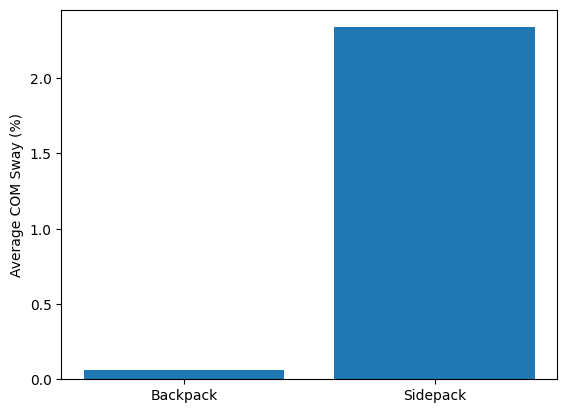

In [156]:

sway_trial=np.mean(percentsway)
sway_side_trial=np.mean(percentsway_sidepack)

plt.bar(['Backpack', 'Sidepack'], [sway_trial, sway_side_trial])
plt.ylabel('Average COM Sway (%)')


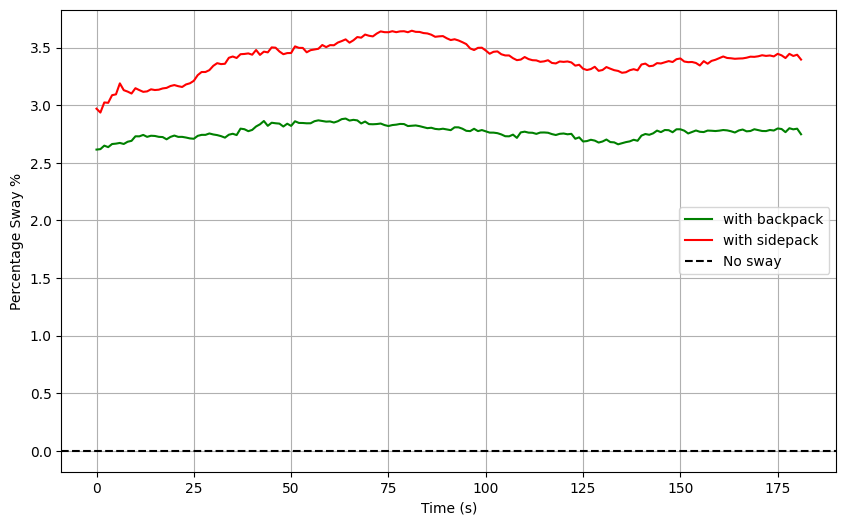

In [157]:
# COM calculation 
# anthropometric data 
m=75 # kg
h=1.75 # m
# pelvis mass
mass_of_pelvis=0.1117 # kg
# segment lengths
pelvis_comz=0.5
# radius of gyration 
pelvis_kx=0.615
pelvis_ky=0.551
pelvis_kz=0.587


# trunk 

trunk_comz=0.4166
trunk_kx=0.328
trunk_ky=0.306
trunk_kz=0.169

# normalize posture sway by hip width 
hip_width=0.191*h
comlthigh=0.433*static['L.Thigh_l_mm']
comrthigh=0.433*static['R.Thigh_l_mm']
compelvis=0.105*static['Pelvis_l_mm']
comtrunk=0.5*static['Trunk_l_mm']
mrthigh=0.1416
mlthigh=0.1416
mpelvis=0.1117
mass_of_trunk=0.3229
M=mrthigh+mlthigh+mpelvis+mass_of_trunk
combody=(mrthigh*comlthigh+mlthigh*comrthigh+mpelvis*compelvis+mass_of_trunk*comtrunk)/M
normalizedcom_static=combody/hip_width

comlthigh_backpack=0.433*backpack_static['L.Thigh_l_mm']
comrthigh_backpack=0.433*backpack_static['R.Thigh_l_mm']
compelvis_backpack=0.105*backpack_static['Pelvis_l_mm']
comtrunk_backpack=0.5*backpack_static['Trunk_l_mm']
combody_backpack=(mrthigh*comlthigh_backpack+mlthigh*comrthigh_backpack+mpelvis*compelvis_backpack+mass_of_trunk*comtrunk_backpack)/M
normalizedcom_backpack_static=combody_backpack[0:182]/hip_width

comlthigh_sidepack=0.433*sidepack_static['L.Thigh_l_mm'] 
comrthigh_sidepack=0.433*sidepack_static['R.Thigh_l_mm']
compelvis_sidepack=0.105*sidepack_static['Pelvis_l_mm']
comtrunk_sidepack=0.5*sidepack_static['Trunk_l_mm']
combody_sidepack=(mrthigh*comlthigh_sidepack+mlthigh*comrthigh_sidepack+mpelvis*compelvis_sidepack+mass_of_trunk*comtrunk_sidepack)/M
normalizedcom_sidepack_static=combody_sidepack[0:182]/hip_width


percentsway=(normalizedcom_backpack_static-normalizedcom_static)/normalizedcom_static*100
percentsway_sidepack=(normalizedcom_sidepack_static-normalizedcom_static)/normalizedcom_static*100




plt.figure(figsize=(10, 6))
plt.plot(percentsway, label="with backpack", color='g')
plt.plot(percentsway_sidepack, label="with sidepack", color='r')
plt.axhline(0, color='black', linestyle='--', label='No sway')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Percentage Sway %")
#plt.title("Impact of Backpack on COM Sway (Static)")
plt.grid(True)
plt.show()






Text(0, 0.5, 'Average COM Sway (%)')

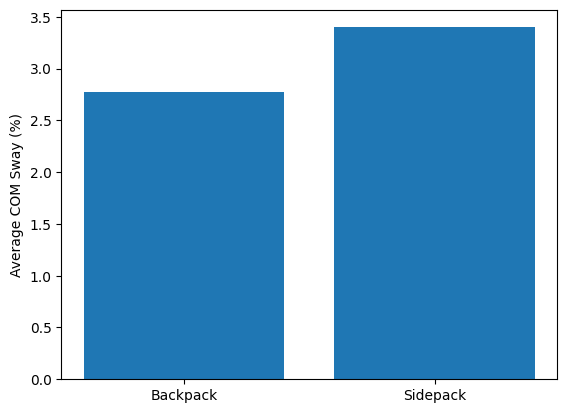

In [158]:

sway_static=np.mean(percentsway)
sway_side_static=np.mean(percentsway_sidepack)

plt.bar(['Backpack', 'Sidepack'], [sway_static, sway_side_static])
plt.ylabel('Average COM Sway (%)')
#plt.title('Average Posture Sway with Different Backpack Configurations')

Further Trunk Tilt Analysis in Sagittal Plane

In [159]:
def quanify_tilt(df):
    metrics={}
    metrics={}
    metrics['mean']=df.mean()
    metrics['std']=df.std()
    metrics['range']=df.max()-df.min()
   # metrics['max_abs_diff']=np.abs(df.diff()).max()
    return metrics


walking_pelvis_stats=quanify_tilt(trial['Pelvis_rx_deg'])
walking_trunk_stats=quanify_tilt(trial['Trunk_rx_deg'])
walking_rthigh_stats=quanify_tilt(trial['R.Thigh_rx_deg'])
walking_lthigh_stats=quanify_tilt(trial['L.Thigh_rx_deg'])

backpack_walking_pelvis_stats=quanify_tilt(backpack_trial['Pelvis_rx_deg'])
backpack_walking_trunk_stats=quanify_tilt(backpack_trial['Trunk_rx_deg'])
backpack_walking_rthigh_stats=quanify_tilt(backpack_trial['R.Thigh_rx_deg'])    
backpack_walking_lthigh_stats=quanify_tilt(backpack_trial['L.Thigh_rx_deg'])

sidepack_walking_pelvis_stats=quanify_tilt(sidepack_trial['Pelvis_rx_deg'])
sidepack_walking_trunk_stats=quanify_tilt(sidepack_trial['Trunk_rx_deg'])
sidepack_walking_rthigh_stats=quanify_tilt(sidepack_trial['R.Thigh_rx_deg'])
sidepack_walking_lthigh_stats=quanify_tilt(sidepack_trial['L.Thigh_rx_deg'])


    

Text(0.5, 1.0, 'Pelvis Tilt Range with Different Backpack Configurations')

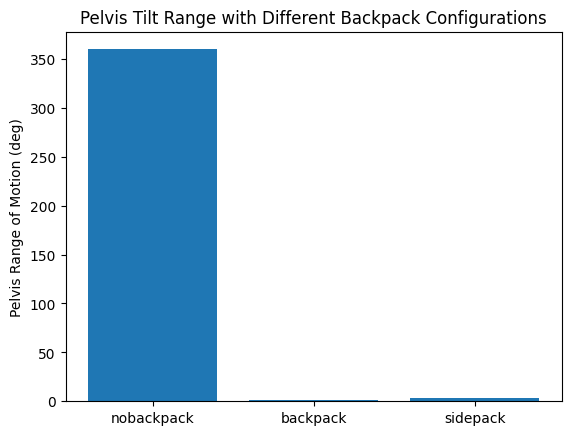

In [160]:
plt.bar(['nobackpack','backpack','sidepack'],[walking_pelvis_stats['range'],backpack_walking_pelvis_stats['range'],sidepack_walking_pelvis_stats['range']])
plt.ylabel('Pelvis Range of Motion (deg)')
plt.title('Pelvis Tilt Range with Different Backpack Configurations')

Above stats show that there is pelvis angle decrease around y axis so , there is flexion and hence pelvis tilt with bag pack. It causes postural sway and stability problem. 

In [161]:
print('Dynamic pelvis stats without backpack: \n',walking_pelvis_stats)
print('Dynamic pelvis stats with backpack: \n',backpack_walking_pelvis_stats)
print('Dynamic pelvis stats with sidepack: \n',sidepack_walking_pelvis_stats)


Dynamic pelvis stats without backpack: 
 {'mean': 163.95366546666668, 'std': 70.64566083245879, 'range': 359.88815999999997}
Dynamic pelvis stats with backpack: 
 {'mean': -176.58149831325304, 'std': 0.4675022903473798, 'range': 1.7062799999999925}
Dynamic pelvis stats with sidepack: 
 {'mean': -177.1413539506173, 'std': 0.9284672319711653, 'range': 3.5763200000000097}


Normal walking :  Mean :: x - general forward tilt , some tilt to left , z- rotated posture potentially due to walking
                  Std ::  variability in rx degrees is much larger than other axes suggesting significant forward-backward pelvis motion.
                  Range :: Pelvis rx - implies full range of motion , ry and rz - connstrained side to side and rotational motion
                  Max absolute difference : rx : Significant forward-backward motion and smaller values of ry & rx indicate smoother transitions in these directions.


Walking with backpack : Mean :: Pelvis's average position shift compared to normal walking 
                                x - pelvis tilts backward more in the sagittal plane potentially due to load compensation 
                                y - slight right tilt possibly due to uneven weight distribution or posture adaptation 
                                z - Pelvis rotates forward which may indicate altered walking mechanics 

                        Std & Range :: All axes show smaller std and ranges compared to normal walking suggesting restricted movement with a backpack (may be due to load stability requirements)
                        Max Absolute Difference : Smaller values across all axes compared to normal walking imply smoother and more controlled motion , likely compensating for backpack's weight


Walking with Sidepack : Mean :: Indicates posture adjustment due to asymmetric load distribution 
                                x -- similiar to backpack walking , there is a backward tilt
                                y --  Significant tilt to right, to counterbalance sidepack load
                                z -- Slightly less forward rotation compared to backpack walking 

                        Std and Range :: Larger variability in ry compared to backpack suggests sidepack induces more side-to-side motion. ? 
                        other axes show controlled motion similar to backpack walking. 
                        Max Absolute Difference :: Slightly higher changes in motion compared to backpack walking , particularly in rz-deg indicating less stability when carrying an asymmetric load.

Conclusion : 
Normal Walking Largest variability and range of motion in all axes , as expected for natural , unrestricted environment. 
Backpack Walking : Restricts motion across all axes and it causes backward tilt (rx) and slight forward rotation (rz) likely due to weight's center of gravity.
Sidepack Walking:  It causes a noticeable tilt ry as subject compensates for asymmetric load. It demonstrates slightly more variablity than backpack walking , especially side-to-side tilt.

Backpack Vs Sidepack: A backpack induces more symmetric motion adjustments, while a sidepack causes significant lateral tilt (ryry), which could lead to uneven strain on the body over time.
Biomechanics: The reduced range of motion in both loaded conditions may indicate altered gait mechanics to stabilize the load and prevent injury.


Text(0.5, 1.0, 'Mean Pelvis Angle with Different Backpack Configurations in Sagittal Plane')

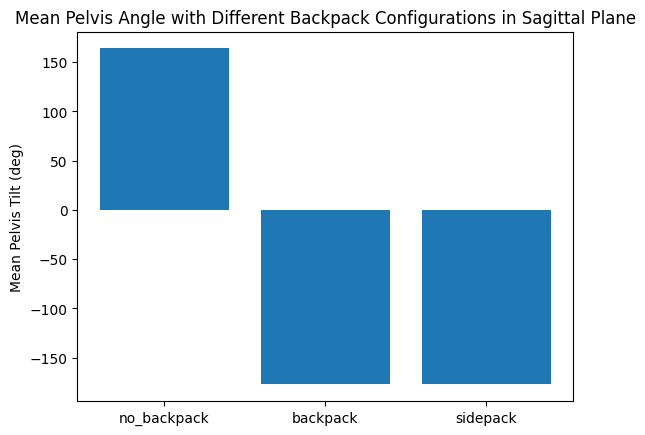

In [162]:
plt.bar(['no_backpack','backpack','sidepack'],[walking_pelvis_stats['mean'],backpack_walking_pelvis_stats['mean'],sidepack_walking_pelvis_stats['mean']])
plt.ylabel('Mean Pelvis Tilt (deg)')
plt.title('Mean Pelvis Angle with Different Backpack Configurations in Sagittal Plane')

Text(0, 0.5, 'Mean Trunk Tilt (deg)')

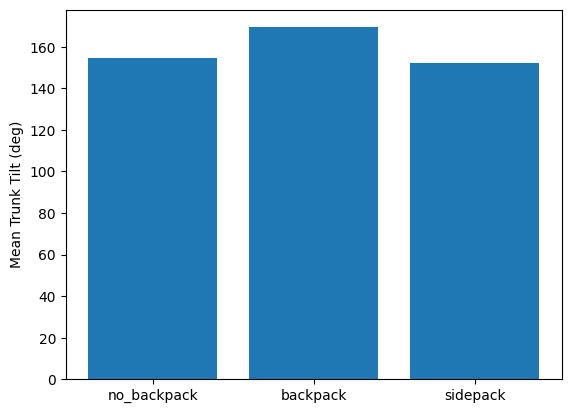

In [163]:
plt.bar(['no_backpack','backpack','sidepack'],[walking_trunk_stats['mean'],backpack_walking_trunk_stats['mean'],sidepack_walking_trunk_stats['mean']])
plt.ylabel('Mean Trunk Tilt (deg)')
#plt.title('Mean Trunk Tilt with Different Backpack Configurations in Sagittal Plane')


Text(0.5, 1.0, 'Mean Trunk Tilt with Different Backpack Configurations in Sagittal Plane')

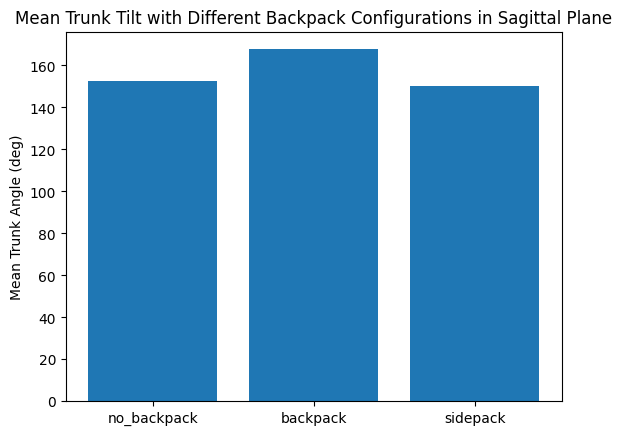

In [164]:
static_tilt=quanify_tilt(static['Trunk_rx_deg'])
backpack_static_tilt=quanify_tilt(backpack_static['Trunk_rx_deg'])
sidepack_static_tilt=quanify_tilt(sidepack_static['Trunk_rx_deg'])

plt.bar(['no_backpack','backpack','sidepack'],[static_tilt['mean'],backpack_static_tilt['mean'],sidepack_static_tilt['mean']])
plt.ylabel('Mean Trunk Angle (deg)')
plt.title('Mean Trunk Tilt with Different Backpack Configurations in Sagittal Plane')


Text(0, 0.5, 'Trunk Range of Motion (deg)')

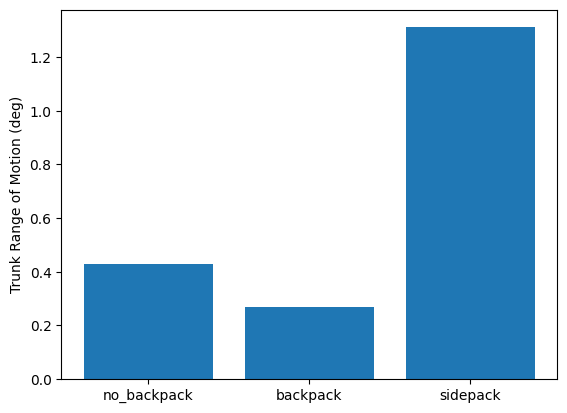

In [165]:
plt.bar(['no_backpack','backpack','sidepack'],[static_tilt['range'],backpack_static_tilt['range'],sidepack_static_tilt['range']])
plt.ylabel('Trunk Range of Motion (deg)')


In [166]:
def analyze_postural_sway(data):
    hip_width = 0.191 * 1.75

    # Extract position data (e.g., pelvis coordinates)
    pelvis_x = data['Pelvis_x_mm']
    pelvis_y = data['Pelvis_y_mm']
    pelvis_z = data['Pelvis_z_mm']
    sway_path = np.sqrt((pelvis_x.diff()**2 + pelvis_y.diff()**2 + pelvis_z.diff()**2).fillna(0))
    normalized_sway_path = sway_path / hip_width
    cumulative_sway = np.cumsum(normalized_sway_path)
    total_sway = cumulative_sway.iloc[-1] 
    percentage_sway = (cumulative_sway / total_sway) * 100
    return normalized_sway_path, percentage_sway

 

In [167]:

walking_normalized,walking_perce = analyze_postural_sway(trial)
backpack_walking_normalized,backpack_walking_perce = analyze_postural_sway(backpack_trial)
sidepack_walking_normalized,sidepack_walking_perce = analyze_postural_sway(sidepack_trial)




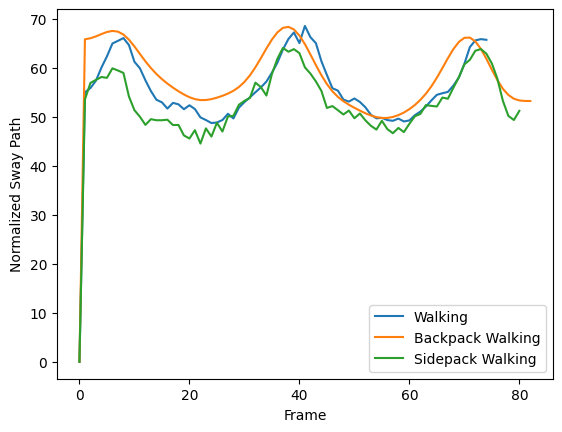

In [168]:
plt.plot(walking_normalized, label='Walking')
plt.plot(backpack_walking_normalized, label='Backpack Walking')
plt.plot(sidepack_walking_normalized, label='Sidepack Walking')
plt.xlabel('Frame')
plt.ylabel('Normalized Sway Path')
#plt.title('Normalized Sway Path')
plt.legend()
plt.show()

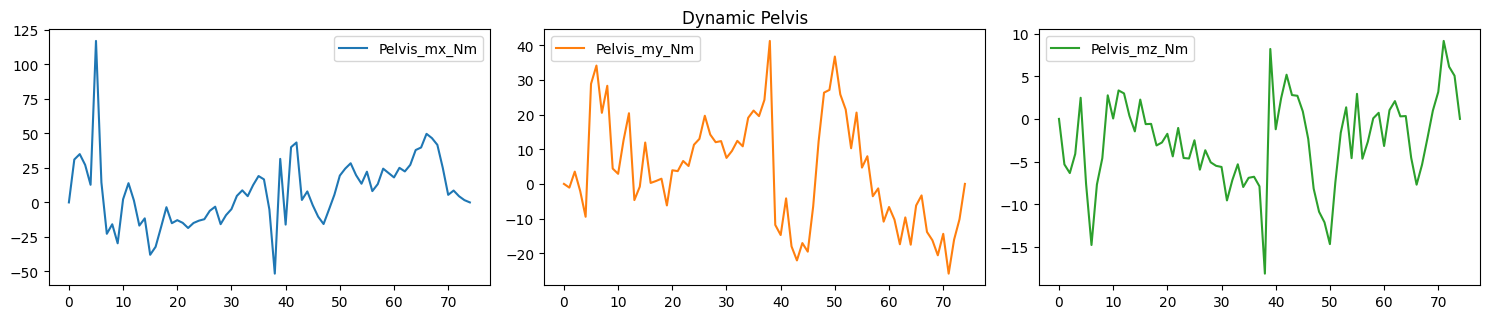

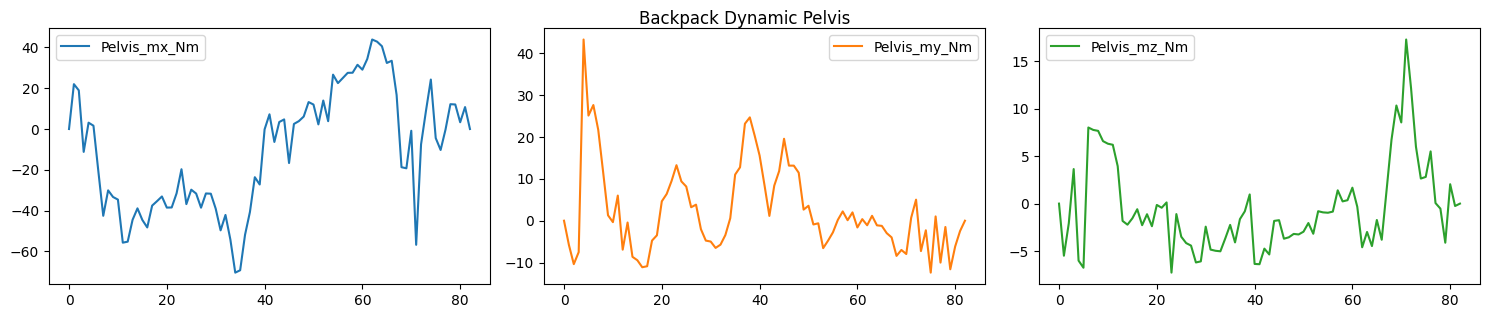

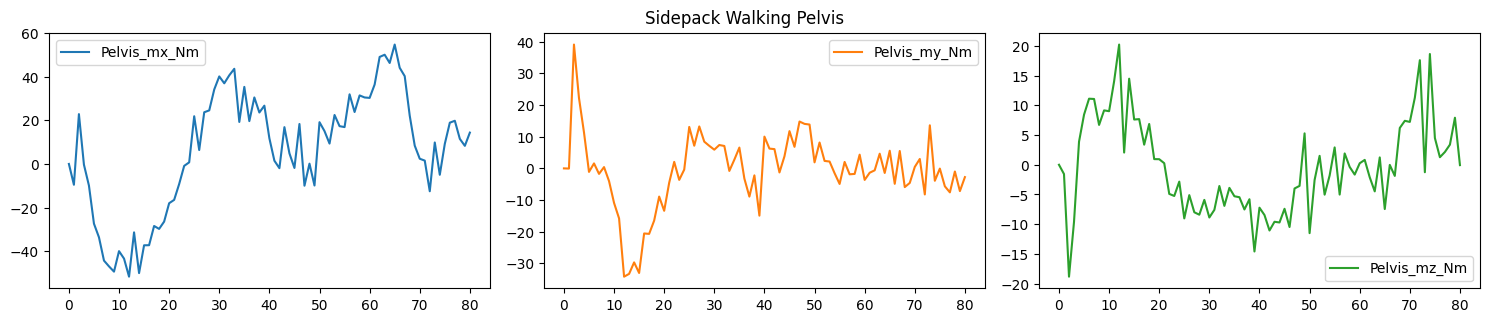

In [169]:
moment_walking_pelvis=trial.loc[:,'Pelvis_mx_Nm':'Pelvis_mz_Nm']
moment_walking_pelvis.plot(subplots=True, layout=(5,3), figsize=(15,15))
plt.suptitle('Dynamic Pelvis')
plt.tight_layout()
plt.show()

moment_backpack_walking_pelvis=backpack_trial.loc[:,'Pelvis_mx_Nm':'Pelvis_mz_Nm']
moment_backpack_walking_pelvis.plot(subplots=True, layout=(5,3), figsize=(15,15))
plt.suptitle('Backpack Dynamic Pelvis')
plt.tight_layout()
plt.show()

moment_sidepack_walking_pelvis=sidepack_trial.loc[:,'Pelvis_mx_Nm':'Pelvis_mz_Nm']
moment_sidepack_walking_pelvis.plot(subplots=True, layout=(5,3), figsize=(15,15))
plt.suptitle('Sidepack Walking Pelvis')
plt.tight_layout()
plt.show()


In [170]:
# Calculating sway metrics as the standard deviation of positional and rotational data
sway_metrics = {
    "Pelvis Sway (mm)": trial[['Pelvis_x_mm', 'Pelvis_y_mm', 'Pelvis_z_mm']].std().mean(),
    "Trunk Sway (deg)": trial[['TrunkLab_rz_deg']].std().values[0]
}

# Range of motion (ROM) for pelvis and trunk
rom_metrics = {
    "Pelvis ROM (deg)": trial[['Pelvis_rx_deg', 'Pelvis_ry_deg', 'Pelvis_rz_deg']].max() - trial[['Pelvis_rx_deg', 'Pelvis_ry_deg', 'Pelvis_rz_deg']].min(),
    "Trunk ROM (deg)": trial[['TrunkLab_rz_deg']].max() - trial[['TrunkLab_rz_deg']].min()
}

sway_metrics, rom_metrics


({'Pelvis Sway (mm)': 144.23309645648695,
  'Trunk Sway (deg)': 5.329561745495406},
 {'Pelvis ROM (deg)': Pelvis_rx_deg    359.88816
  Pelvis_ry_deg      1.99890
  Pelvis_rz_deg      7.27728
  dtype: float64,
  'Trunk ROM (deg)': TrunkLab_rz_deg    15.92107
  dtype: float64})

Verification of Hypothesis

In [171]:
# just for test case 
ms=np.mean(normalizedcom_static)
mb=np.mean(normalizedcom_backpack_static)
mbs=np.mean(normalizedcom_sidepack_static)

n1=len(normalizedcom_static)
n2=len(normalizedcom_backpack_static)

pooled_std=np.sqrt(((n1-1)*np.std(normalizedcom_static)**2+(n2-1)*np.std(normalizedcom_backpack_static)**2)/(n1+n2-2))
t=(ms-mb)/(pooled_std*np.sqrt(1/n1+1/n2))
t

-348.90581310855583